In [3]:
import rosbag_pandas as rbp
import pandas as pd
import rosbag
import math
import matplotlib.pyplot as plt
import datetime
import lz4

In [4]:
df = rbp.bag_to_dataframe('/home/gera/op3_bag/pid/25_03/1200/2019-03-25-16-30-04.bag')

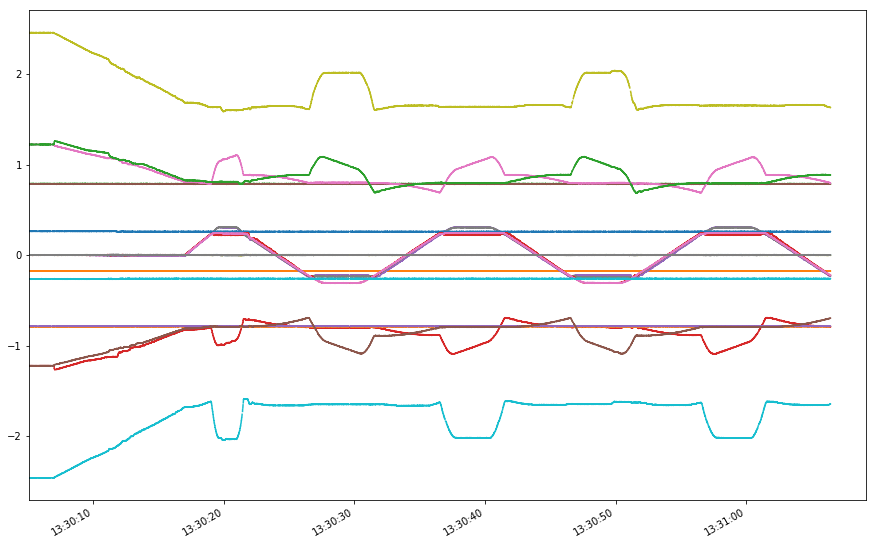

In [6]:
df.index = pd.to_datetime(df.index, unit='s').tz_localize('Europe/Moscow')
dz = df.copy(deep=True)
df.filter(regex="/present_joint_states/position", axis=1).resample("8L").mean().plot(legend=False, figsize=(15, 10))

count    5.800000e+01
mean     2.001073e-03
std      6.310964e-03
min     -6.676375e-03
25%     -3.055191e-03
50%      1.886078e-17
75%      6.252893e-03
max      1.605254e-02
Name: error, dtype: float64

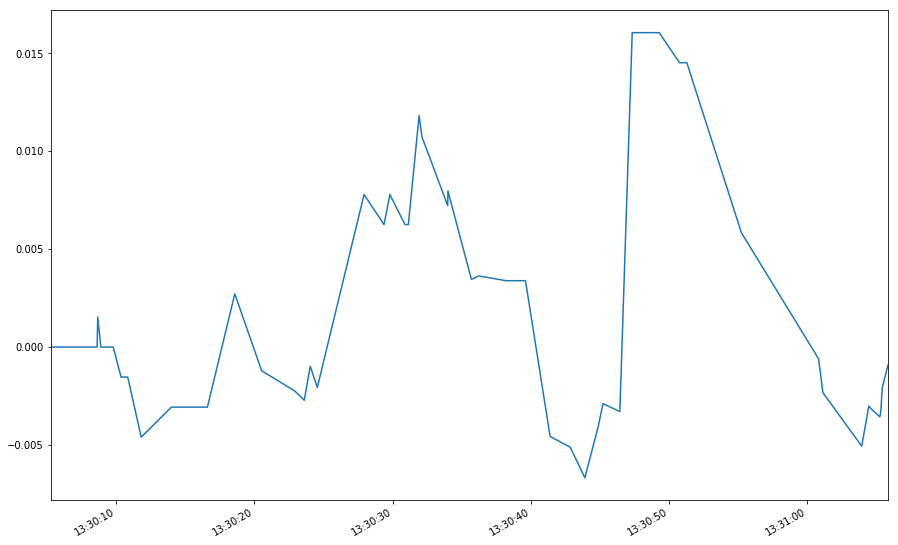

In [27]:
df_goal = df.filter(regex='goal_joint_states/position/15')
df_pres = df.filter(regex='present_joint_states/position/15')
df_comp = df_goal.join(df_pres)

#err_ = df_goal.diff(axis=1) #.dropna()
df_comp['error'] = df_comp['/robotis/goal_joint_states/position/15'] - df_comp['/robotis/present_joint_states/position/15']

err_ser.dropna().plot(legend=False, figsize=(15, 10))
err_ser.describe()
